In [3]:
from datetime import date, timedelta
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
from src.core.repositories.stock_repository import get_repository, StockRepositoryConfig
from server.config import config as server_config
from src.core.lib.analysis.returns import returns

In [5]:
start = date.today() - timedelta(weeks=52)
end = date.today()

In [6]:
iex_config = server_config['sandbox']['iexcloud']
mysql_config = server_config['sandbox']['db']

In [7]:
repo = get_repository(iex_config=iex_config, mysql_config=mysql_config)

In [39]:
spy = repo.historical_daily('SPY', start=start, end=end)
aapl = repo.historical_daily('AAPL', start=start, end=end)

In [40]:
spy['prev'] = spy['close'].shift(1)
spy['return'] = spy['close'] / spy['prev'] - 1

aapl['prev'] = aapl['close'].shift(1)
aapl['return'] = aapl['close'] / aapl['prev'] - 1

In [41]:
spy_df = pd.DataFrame(data=spy[['date','return']])

,date,SPY
0,2020-09-22,NaN
1,2020-09-23,-0.034756
2,2020-09-24,0.039077
3,2020-09-25,-0.024018
4,2020-09-28,0.034900
...,...,...
246,2021-09-14,0.028906
247,2021-09-15,-0.008325
248,2021-09-16,-0.012777
249,2021-09-17,0.008547


In [42]:
aapl_df = pd.DataFrame(data=aapl[['date','return']])

,return
date,
2020-09-22,NaN
2020-09-23,-0.049586
2020-09-24,0.006645
2020-09-25,0.017395
2020-09-28,0.010434
...,...
2021-09-14,-0.015351
2021-09-15,0.018364
2021-09-16,-0.018293


In [49]:
df = spy_df.copy()
df['AAPL'] = aapl_df['return']
df = df.set_index('date')
df = df.rename(columns={'return': 'SPY'})

In [50]:
df.head()

,SPY,AAPL
date,,
2020-09-22,NaN,NaN
2020-09-23,-0.034756,-0.049586
2020-09-24,0.039077,0.006645
2020-09-25,-0.024018,0.017395
2020-09-28,0.034900,0.010434


<AxesSubplot:xlabel='date'>

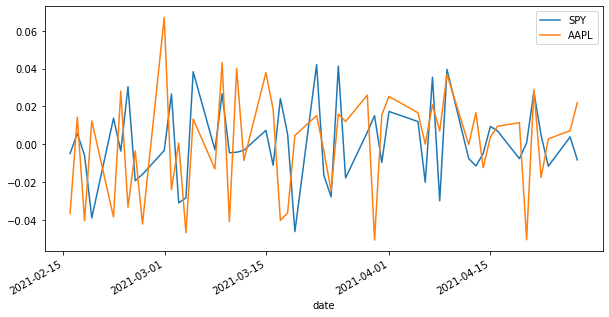

In [51]:
df.iloc[100:150].plot(figsize=(10,5))

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

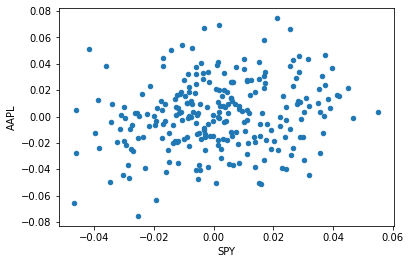

In [52]:
df.plot.scatter('SPY', 'AAPL')

In [53]:
df.dropna(inplace=True)
X = df[['SPY']].to_numpy()
Y = df[['AAPL']].to_numpy()

In [54]:
X.shape, Y.shape

((250, 1), (250, 1))

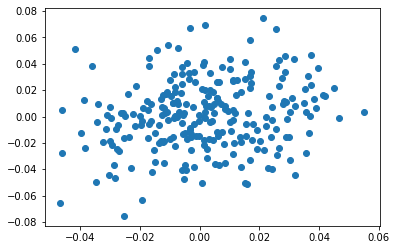

In [55]:
plt.scatter(X, Y)

In [56]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [57]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

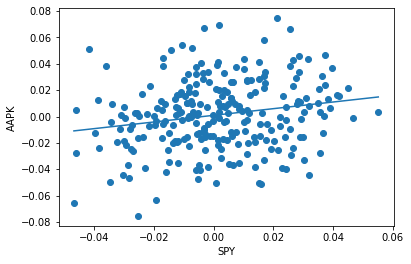

In [58]:
plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPK');
plt.plot(X_predict, Y_predict);

In [59]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00089532]), array([[0.25235199]]))

In [60]:
df.std()

SPY     0.020455
AAPL    0.026252
dtype: float64

In [61]:
df['AAPL'].std() / df['SPY'].std()

1.2834178876021058